# Example Electrolyzer Run

This example simulates an electrolyzer stack running based on at constant power signal for a long period of time (>10000 hours). The `run_electrolyzer` function accepts either a YAML filepath, or a Dictionary representing a valid model specification. The full structure for an electrolyzer model is defined in the source code, in `modeling_schema.yaml`.

In [15]:
import numpy as np

from electrolyzer import run_electrolyzer
from electrolyzer.inputs.validation import load_modeling_yaml

import matplotlib.pyplot as plt

In [16]:
turbine_rating = 3.4  # MW

# Create test signal
test_signal_angle = np.linspace(0, 8 * np.pi, 3600 * 8 + 10)
base_value = (turbine_rating / 2) + 0.2
variation_value = turbine_rating - base_value
power_test_signal = (base_value + variation_value * np.cos(test_signal_angle)) * 1e6

t_span = 50000 # hours
power_test_signal = base_value * np.ones(t_span) * 1e6 # W

### Approach 1: YAML File

In [17]:
fname_input_modeling = "./modeling_options.yaml"

In [18]:

elec_sys, result_df = run_electrolyzer(fname_input_modeling, power_test_signal)


`run_electrolyzer` returns a tuple containing the `Supervisor` instance as well as a time-series `pandas.DataFrame`.

In [19]:
type(elec_sys)
print(elec_sys)

Supervisor(dt=3600, stack={'cell_area': 1500.0, 'max_current': 3000, 'temperature': 60, 'n_cells': 200, 'stack_rating_kW': 1250.0, 'anode_pressure': 101325.0, 'cathode_pressure': 3039750.0, 'membrane_thickness': 0.03, 'include_degradation_penalty': True, 'dt': 3600}, costs={}, control={'n_stacks': 1, 'control_type': 'BaselineDeg'}, initialize=True, initial_power_kW=1250.0, name='electrolyzer_001', description='A PEM electrolyzer model', control_type='BaselineDeg', n_stacks=1, eager_on=False, eager_off=False, sequential=False, even_dist=False, baseline=True, stack_min_power=125000.0, system_rating_MW=NOTHING, stack_rating_kW=1250.0, stack_rating=1250000.0, active_constant=array([0.]), active=array([1.]), waiting=array([0.]), variable_stack=0, stack_rotation=array([0]), stacks_on=0, stacks_waiting_vec=array([0.]), deg_state=array([0.05956145]), filter_width=NOTHING, past_power=NOTHING, stacks=array([Stack(cell_area=1500.0, max_current=3000, temperature=60, n_cells=200, dt=3600, anode_pre

In [20]:
result_df.tail()

,power_signal,power_left,curtailment,kg_rate,stack_1_deg,stack_1_fatigue,stack_1_cycles,stack_1_uptime,stack_1_kg_rate,stack_1_curr_density,stack_1_voltage,stack_1_current,stack_1_current_deg
49995,1900000.0,-30847.111039,0.65,18.971124,0.059557,0,0.0,179985600.0,0.00527,1.805645,2.364519,2708.467856,2643.244226
49996,1900000.0,-30847.111039,0.65,18.971124,0.059558,0,0.0,179989200.0,0.00527,1.805645,2.364520,2708.467856,2643.242877
49997,1900000.0,-30847.111039,0.65,18.971124,0.059559,0,0.0,179992800.0,0.00527,1.805645,2.364521,2708.467856,2643.241529
49998,1900000.0,-30847.111039,0.65,18.971124,0.059560,0,0.0,179996400.0,0.00527,1.805645,2.364522,2708.467856,2643.240180
49999,1900000.0,-30847.111039,0.65,18.971124,0.059561,0,0.0,180000000.0,0.00527,1.805645,2.364523,2708.467856,2643.238831


## Example Usage

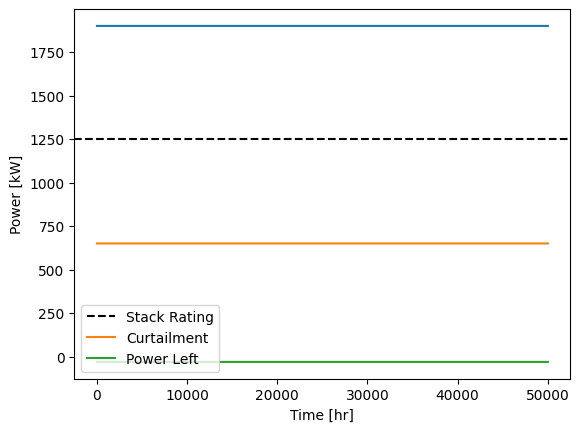

In [21]:
plt.figure()
plt.plot(result_df["power_signal"]/1e3)
plt.axhline(elec_sys.stack_rating_kW, xmin=0, xmax=t_span, linestyle='dashed', label='Stack Rating',color='black')
plt.plot(result_df["curtailment"]*1e3,label='Curtailment')
plt.plot(result_df["power_left"]/1e3, label='Power Left')
plt.ylabel('Power [kW]')
plt.xlabel('Time [hr]')
plt.legend(loc='lower left')
#result_df["power_signal"].plot(title="Power Signal", xlabel="Time (s)", ylabel="Power (W)")

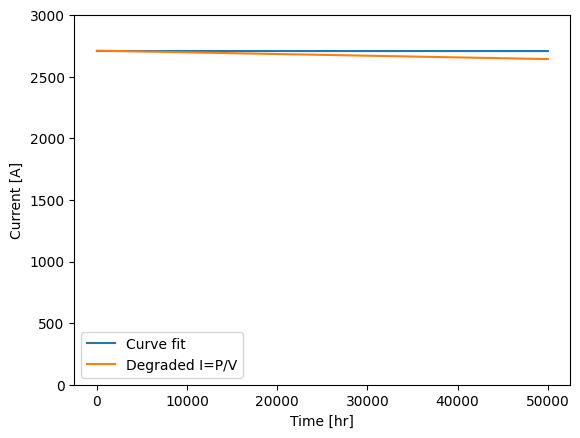

In [30]:
plt.figure()
plt.plot(result_df["stack_1_current"],label='Curve fit')
#plt.axhline(elec_sys.stack_rating_kW, xmin=0, xmax=t_span, linestyle='dashed', label='Stack Rating',color='black')
plt.plot(result_df["stack_1_current_deg"],label='Degraded I=P/V')
#plt.plot(result_df["power_left"]/1e3, label='Power Left')
plt.ylabel('Current [A]')
plt.ylim([1000,3000])
plt.xlabel('Time [hr]')
plt.legend(loc='lower left')

<AxesSubplot:title={'center':'Cell Voltage by stack'}, xlabel='Time (hr)', ylabel='Cell Voltage (V)'>

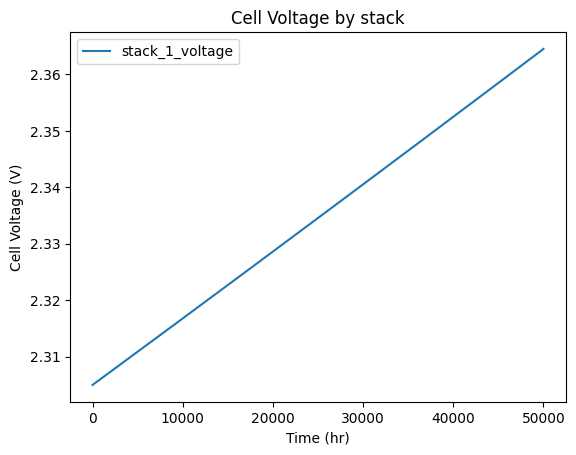

In [23]:
cell_voltage = result_df[[col for col in result_df.columns if "volt" in col]]
cell_voltage.plot(title="Cell Voltage by stack", xlabel="Time (hr)", ylabel="Cell Voltage (V)")

<AxesSubplot:title={'center':'H2 production rate'}, xlabel='Time (hr)', ylabel='H2 rate (kg/hr)'>

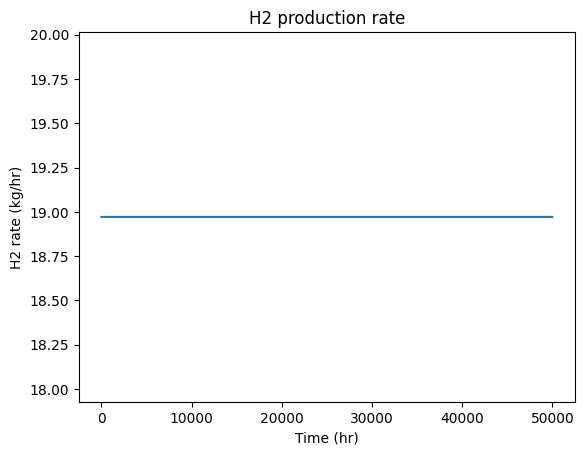

In [24]:
result_df["kg_rate"].plot(title="H2 production rate", xlabel="Time (hr)", ylabel="H2 rate (kg/hr)")

<AxesSubplot:title={'center':'H2 production rate by stack'}, xlabel='Time (hr)', ylabel='H2 (kg/s)'>

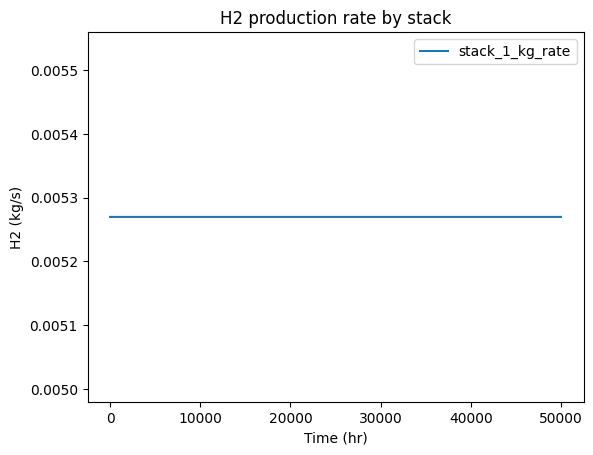

In [25]:
stack_rates = result_df[[col for col in result_df.columns if "_kg_rate" in col]]

stack_rates.plot(title="H2 production rate by stack", xlabel="Time (hr)", ylabel="H2 (kg/s)")

<AxesSubplot:title={'center':'Degradation by stack'}, xlabel='Time (s)', ylabel='Degradation (V)'>

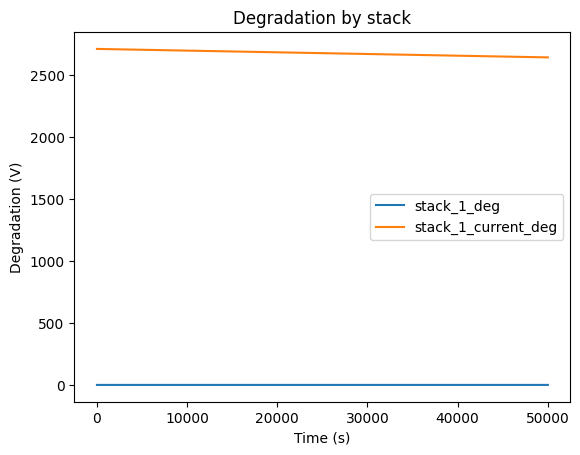

In [26]:
deg = result_df[[col for col in result_df.columns if "deg" in col]]
deg.plot(title="Degradation by stack", xlabel="Time (s)", ylabel="Degradation (V)")

<AxesSubplot:title={'center':'Current Density by stack'}, xlabel='Time (s)', ylabel='Current Density ($A/cm^2$)'>

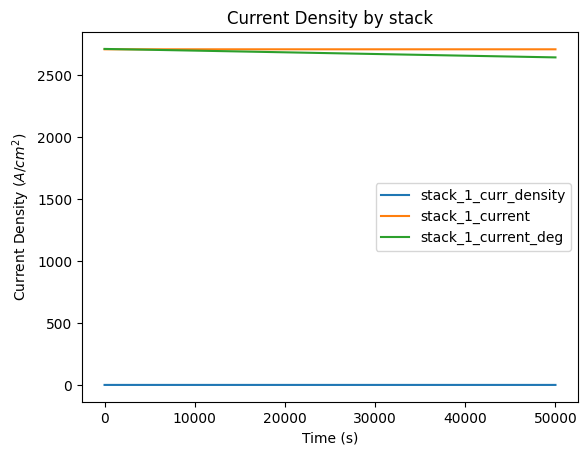

In [27]:
curr_dens = result_df[[col for col in result_df.columns if "curr" in col]]
curr_dens.plot(title="Current Density by stack", xlabel="Time (s)", ylabel="Current Density ($A/cm^2$)")

In [28]:
# Total kg
print(f"Max. Curtailed: {result_df['curtailment'].max()*1e3} kW")
print(f"Total H2: {result_df['kg_rate'].sum():.2f} kg")
print(f"Max. Current Density: {curr_dens.max().values[0]:.4f} A/cm^2")
print(f"Max. Degradation: {deg.max().values[0]:.4f} V")


Max. Curtailed: 650.0 kW
Total H2: 948556.21 kg
Max. Current Density: 1.8056 A/cm^2
Max. Degradation: 0.0596 V
